2023: Notiz für das nächste Jahr: Die Zeit war knapp, wir sollten entschlacken.
- Abschnitt 1: Visualisierung kategorischer Größen in VL02 schieben.
- Abschnitt 3: Pandas Funktionalität zur Indizierung in VL04 schieben.

2024: Die Zeit war wieder knapp (Teil 3 nur in 7 Minuten überflogen, muss nächste Woche erneut im Detail besprochen werden), evtl. Teil 2 stark kürzen?

2025: Nochmal den dritten Teil von VL02 durchgegangen, dafür mittleren Teil von VL03 entfernt. Den Zeitrahmen etwa eingehalten. Nächstes mal evtl. den dritten Teil von VL02 komplett integrieren (dann Problem mit den ersten beiden Übungen, da diese auf diesen Teil verweist). Nächstes mal:
- drop_first vielleicht besser an einer anderen Spalte als sex diskutieren (m/f/d)
- darüber nachdenken, ob pandas encoder überhaupt praxisrelevant sind, wenn wir sowieso sklearn Funktionalität empfehlen, ggf. hier kürzen
- sns.pairplot statt selbstgeschriebener show_heartdata
- wenn viel Zeit: besseres Beispiel suchen, wo max_depth-Parameter deutlicher vor Overfitting schützt

In [17]:
def rufe(name, loud=False):
    if loud:
        print(f"HALLO, {name.upper()}!")
    else:
        print(f"Hallo, {name}!")

rufe("Bob") # Verwendung des Default-Wertes
rufe("Fred", True)

Hallo, Bob!
HALLO, FRED!


Kann man eine Liste mit Argumenten ("positional") übergeben?

In [117]:
argumente = ["Bob", True]
rufe ( argumente )         # falsch


Hallo, ['Bob', True]!


In [118]:
rufe ( *argumente )
# richtig: Die spezielle
# "Asterisk"-Syntax * "entpackt"
# eine Liste


HALLO, BOB!


**Entpacken** von Dictionaries mit dem Asterisk-Operator:

In [19]:
# Wie war die Funktion "rufe" nochmal deklariert?
# Alternativ: ?rufe (für docstring) und ??rufe (für den kompletten Quelltext)
help(rufe)

Help on function rufe in module __main__:

rufe(name, loud=False)



In [189]:
# Entpacken mit dem **-Operator
d = {"loud": True, "name": "Fred"}
rufe(**d) 
# äquivalent zu: rufe(loud=True,
#                     name="Fred")

HALLO, FRED!


In [340]:
# Kann auch mit dem *-Operator
# kombiniert werden:
rufe(*["Fred"], **{"loud":True})

HALLO, FRED!


<img src="VL03_Material/datenarten.png" width="80%" />
<div class="tinyfont">Abb. 3 aus: Nazemi, Kawa & Kaupp, Lukas & Burkhardt, Dirk & Below, Nicola. (2021). Datenvisualisierung. 10.1515/9783110657807-026.</div>

# <div style="color:blue;">1. Visualisierung und Encodings</div>
# <div>2. DecisionTreeClassifier</div>

### 1.1 Datentyp (=Skala), Datendimensionalität und Datenarten

<center>
<img src="VL03_Material/datenarten.png" width="60%" />
<div class="tinyfont">Abb. 3 aus: Nazemi, Kawa & Kaupp, Lukas & Burkhardt, Dirk & Below, Nicola. (2021). Datenvisualisierung. 10.1515/9783110657807-026.</div>
    </center>

### 1.2 Wiederholung: Visualisierung von numerischen Daten

In [44]:
# Äquivalent:
# import pandas as pd
# data_oldpeak = pd.read_csv(
#    "VL02_Material/heart.csv")["Oldpeak"].tolist()

with open("VL02_Material/heart_oldpeak.txt","r") as f:
    data_oldpeak = f.read() \
        .replace("[","")    \
        .replace("]","")    \
        .split(",")
    data_oldpeak = [float(x) for x in data_oldpeak]

data_oldpeak[:5]


[0.0, 1.0, 0.0, 1.5, 0.0]

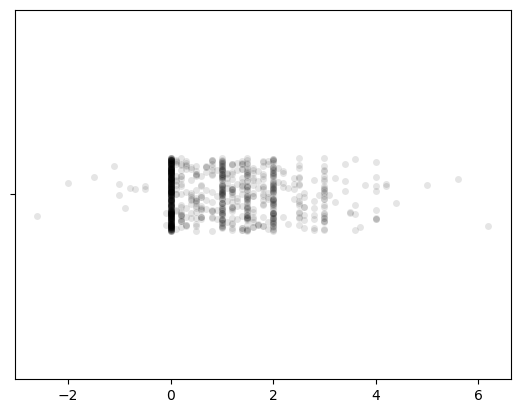

In [47]:
# Strip-Plot mit sinnvollen Default-Argumenten

import seaborn as sns

def mystripplot(data, color="black",
                alpha=1.0, title="" ):
    ax = sns.stripplot ( data=data, orient="h",
                         color=color,
                         alpha=alpha )
    ax.set( title=title )

mystripplot ( data_oldpeak, alpha=0.1 )


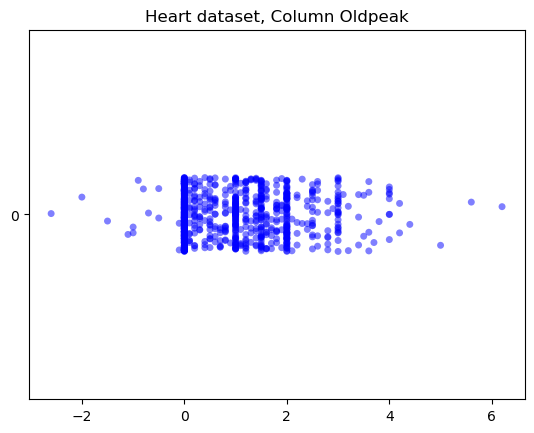

In [420]:
# Unpacking mit "Asterisk" *

styledict = {"color": "blue",
             "alpha": 0.5}         # Dictionary, also eine Sammlung von key/value-pairs

mystripplot ( data_oldpeak, title="Heart dataset, Column Oldpeak", **styledict )
# mit ** wird das Dictionary entpackt und die Inhalte als Keyword-Argumente verwendet

# ... ist das gleiche wie:
# mystripplot ( data_oldpeak, title="Heart dataset, Column Oldpeak", color="blue", alpha=0.5 )

# Frage: Was ist ein Positional Argument? Was ist ein Keyword Argument?


Der \*-Operator kann auch in der Funktionsdeklaration verwendet werden:
- \*args für beliebig viele Positional-Argumente
- \*\*kwargs für beliebig viele Keyword-Argumente

**Achtung:** Nach \*args können Argumente nur noch per Keyword angesprochen werden (positional unerreichbar)

In [421]:
def mystripplot(data, *args, title, **kwargs ):
    kwargs["s"] = 50 # innerhalb der Funktion ist kwargs ein Dictionary, das die keyword-Argumente enthält
    ax = sns.stripplot ( data=data, orient="h", **kwargs )
    ax.set( title=title )

mystripplot ( data_oldpeak, 123, 456, 789, "Heart dataset, Column Oldpeak", color="blue", alpha=0.5, marker="^" )


TypeError: mystripplot() missing 1 required keyword-only argument: 'title'

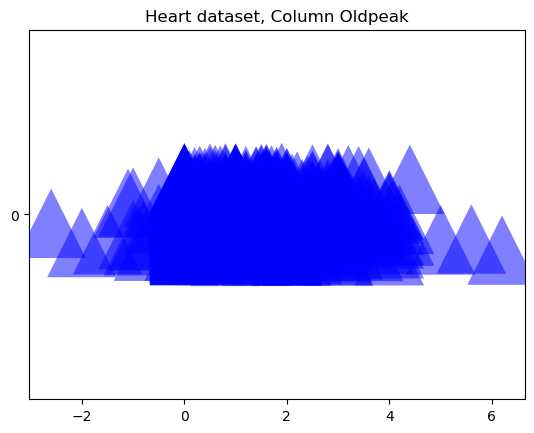

In [90]:
# Nun sprechen wir das title-Argument Argument korrekt via Keyword an:

def mystripplot(data, *args, title, **kwargs ):
    kwargs["s"] = 50 # innerhalb der Funktion ist kwargs ein Dictionary, das die keyword-Argumente enthält
    ax = sns.stripplot ( data=data, orient="h", **kwargs )
    ax.set( title=title )

mystripplot ( data_oldpeak, 123, 456, 789, title="Heart dataset, Column Oldpeak", color="blue", alpha=0.5, marker="^" )


In `seaborn.stripplot`: Eine Benennung der Argumente wird mit \* erzwungen. Weitere mögliche Argumente für die intern verwendeten low-level-Plotmethoden werden mit \*\*kwargs "durchgereicht".

In [ ]:
def stripplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None,
                      jitter=True, dodge=False, orient=None, color=None, palette=None,
                      size=5, edgecolor='gray', linewidth=0, hue_norm=None,
                      native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)
    ...
    size = kwargs.get("s", size)
    
    kwargs.update(
        s=size ** 2,
        edgecolor=edgecolor,
        linewidth=linewidth,
    )
    ...
    points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **kwargs)
    ...

<div class="tinyfont">https://github.com/mwaskom/seaborn/blob/f9827a3ae2a998aeeb97d1931ae03f8a3f7109c2/seaborn/categorical.py (Z. 416, 2618, 2658)</div>

<div class="alert alert-block alert-warning">

**Frage:** Was passiert in Zeile 6?

</div>

<div class="alert alert-block alert-success">
Zur Angabe der Punktgröße verwendet seaborn.stripplot den Parameter size. Daneben gibt es noch den low-level-Parameter s der unterliegenden Matplotlib-API. In Zeile 6 wird die Variable size durch s überschrieben, falls letztere angegeben wurde (d.h. vorhanden ist im Dictionary kwargs).
</div>

### 1.3 Plotting mit Matplotlib

(Grundlage für Pandas und Seaborn)
- Konvention: `
import matplotlib.pyplot as plt
`
- Basisobjekte `Figure` und `Axes`, z.B. via  
`
fig, axes = plt.subplots (             `  
`   figsize=(5,2), nrows=2, ncols=2 ) `
- **"implicit" interface**: Einfache Plot-Funktionalität  
via `plt`
- **"explicit" interface**: Feinere Steuermöglichkeit  
via `ax`

In [53]:
# Erzeuge Daten (später mehr zu numpy)
import numpy as np
x = np.arange (-7, 7, 0.5)
y = np.sin(x) # vektorielles Rechnen, Ergebnis ist
#               ein Vektor von Funktionswerten
x[:5]


array([-7. , -6.5, -6. , -5.5, -5. ])

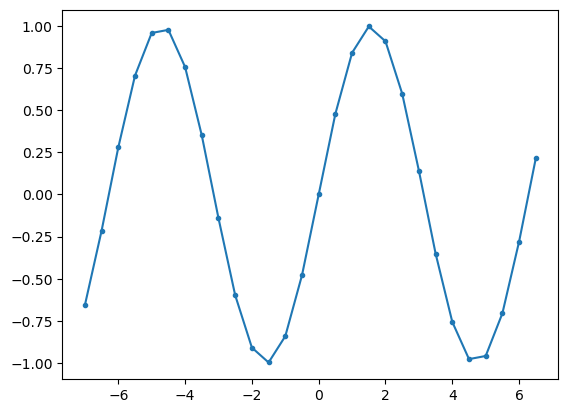

In [56]:
# implizites Interface
import matplotlib.pyplot as plt
plt.plot ( x, y, marker="." );

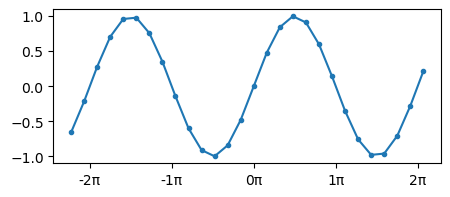

In [55]:
# explizites Interface: nicht möglich im Interface plt.plot ( x,y )
fig, ax = plt.subplots ( figsize=(5,2) )
ax.plot ( x, y, marker="." );
ax.set_xticks ( [i*np.pi for i in range(-2,3)] )
ax.set_xticklabels ( [f"{i}π" for i in range(-2,3)] );

**Vokabular:**

<img src="VL03_Material/matplotlib.png" width="80%" />
<div class="tinyfont">https://matplotlib.org/stable/tutorials/introductory/quick_start.html#sphx-glr-tutorials-introductory-quick-start-py</div>

**Grundlegende Plotbefehle:**
- `plt.scatter` / `ax.scatter`: Punkte
- `plt.plot` / `ax.plot`: Linien

**Beschriftungen:**
- `plt.xlabel` / `ax.set_xlabel` (ebenso für y)
- `plt.xticks` / `ax.set_xticks` (ebenso für y)
- \- / `ax.set_xticklabels` (ebenso für y)
- `plt.title` / `ax.set_title`: Titel je Plot
- `plt.suptitle` / - : Titel über Subplots

**Skalierung und Formatierung:**
- `plt.xlim` / `ax.set_xlim` (ebenso für y)
- `plt.tight_layout` / - : Subplot-Abstände

Ein Beispiel für einen Plot mit Subplots (weiterhin `x=np.arange(-7,7,0.1)`):

C:\Users\schirmef\AppData\Local\Temp\ipykernel_12608\4138917434.py:12: RuntimeWarning: divide by zero encountered in true_divide
  axes[1,1].plot ( x, 1/np.tan(x) ); axes[1,1].set_title ( "Cotangens" )


Text(0.5, 1.0, 'Cotangens')

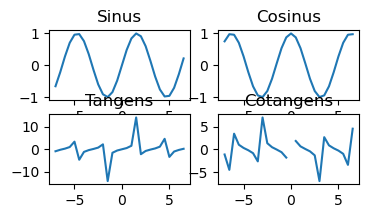

In [58]:
fig, axes = plt.subplots ( figsize=(4,2), nrows=2, ncols=2 )  # Rückgabewert axes ist ein (Numpy) Array
# Plot links oben
axes[0,0].plot ( x, np.sin(x) ); axes[0,0].set_title ( "Sinus" )

# Plot rechts oben
axes[0,1].plot ( x, np.cos(x) ); axes[0,1].set_title ( "Cosinus" )

# Plot links unten 
axes[1,0].plot ( x, np.tan(x) ); axes[1,0].set_title ( "Tangens" )

# Plot rechts unten 
axes[1,1].plot ( x, 1/np.tan(x) ); axes[1,1].set_title ( "Cotangens" )


Korrigiere die Abstände zwischen den Subplots mit `plt.tight_layout` und füge eine Überschrift hinzu:

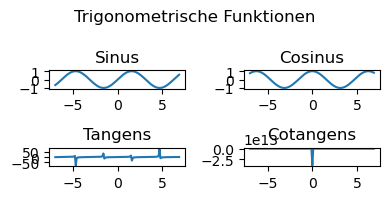

In [17]:
fig, axes = plt.subplots ( figsize=(4,2), nrows=2, ncols=2 )  # Rückgabewert axes ist ein (Numpy) Array
# Plot links oben
axes[0,0].plot ( x, np.sin(x) ); axes[0,0].set_title ( "Sinus" )

# Plot rechts oben
axes[0,1].plot ( x, np.cos(x) ); axes[0,1].set_title ( "Cosinus" )

# Plot links unten 
axes[1,0].plot ( x, np.tan(x) ); axes[1,0].set_title ( "Tangens" )

# Plot rechts unten 
axes[1,1].plot ( x, 1/np.tan(x) ); axes[1,1].set_title ( "Cotangens" )

plt.suptitle("Trigonometrische Funktionen")
plt.tight_layout( );


Vereinfachung des Codes (damit wir den Plot in den Slides größer machen können) mittels `zip`:

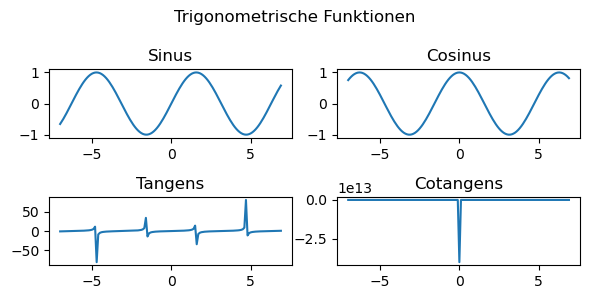

In [20]:
fig,axes = plt.subplots(figsize=(6,3),nrows=2,ncols=2)

for ax, f, title in zip ( axes.flatten(),
                          [np.sin, np.cos, np.tan,
                           lambda x: 1/np.tan(x)],
                          ["Sinus", "Cosinus",
                           "Tangens", "Cotangens"] ):
    ax.plot ( x, f(x) )
    ax.set_title ( title )

plt.suptitle ( "Trigonometrische Funktionen" )
plt.tight_layout ( );


In [21]:
# Rank 2-Array
a = np.array ( [[1,2],[3,4]] )
a


array([[1, 2],
       [3, 4]])

In [22]:
# Mit .flatten wird ein höherdimensionales Array
# in ein Array ohne zusätzliche Dimensionen umge-
# wandelt
a.flatten()


array([1, 2, 3, 4])

In [28]:
# zip zum Verknüpfen von Listen gleicher Länge
list ( zip([1,2,3], [4,5,6]) )


[(1, 4), (2, 5), (3, 6)]

Entfernen eines Plots ("Cotangens ist ja nur 1/Tangens"):

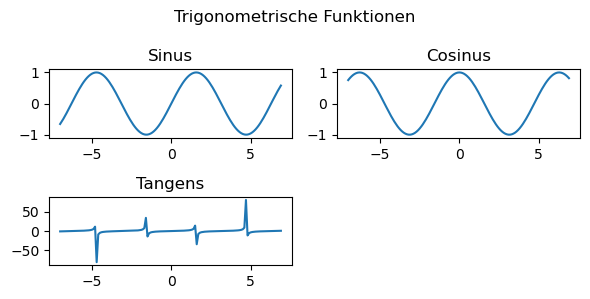

In [40]:
fig,axes = plt.subplots ( figsize=(6,3), nrows=2, ncols=2)

for ax, f, title in zip ( axes.flatten()[:-1], [np.sin, np.cos, np.tan], ["Sinus", "Cosinus", "Tangens"] ):
    ax.plot ( x, f(x) )
    ax.set_title ( title )

axes[1,1].axis("off")

plt.suptitle ( "Trigonometrische Funktionen" )
plt.tight_layout ( );


Anordnung in einer Zeile oder Spalte ist sinnvoller. Verwendung von `sharex` und `set_xticklabels`:

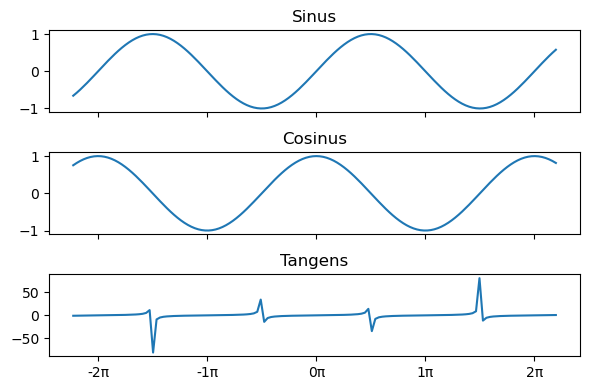

In [52]:
fig,axes = plt.subplots ( figsize=(6,4), nrows=3, ncols=1, sharex=True )

for ax, f, title in zip ( axes, [np.sin, np.cos, np.tan], ["Sinus", "Cosinus", "Tangens"] ):
    ax.plot ( x, f(x) )
    ax.set_title ( title )

axes[0].set_xticks ( [i*np.pi for i in range(-2,3)] )
axes[0].set_xticklabels ( [f"{i}π" for i in range(-2,3)] );
    
plt.tight_layout ( );


Abschließend: Text und Annotations.

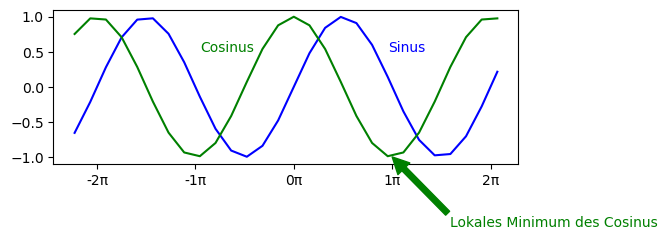

In [60]:
fig,ax = plt.subplots ( figsize=(6,2) )

ax.plot ( x, np.sin(x), color="blue" )
ax.plot ( x, np.cos(x), color="green" )
ax.set_xticks ( [i*np.pi for i in range(-2,3)] )
ax.set_xticklabels ( [f"{i}π" for i in range(-2,3)] );

ax.text ( s="Sinus",   x=3,  y=0.5, color="blue"  );
ax.text ( s="Cosinus", x=-3, y=0.5, color="green" );
# Standardmäßig werden die Koordinaten im "Datenkoordinatensystem" angegeben.
# Mit transform=ax.transAxes können die Koordinaten auch relativ zum Plotfenster angegeben werden; (0,0) ist dann "links unten".

ax.annotate ( "Lokales Minimum des Cosinus", xy=(np.pi,-1.0), xytext=(5,-2),
              arrowprops=dict(color="green"), color="green" );


### 1.4 Werteskalen

In [8]:
import pandas as pd
df = pd.read_csv("VL02_Material/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Daten können in verschiedenen Skalen vorliegen:

**Kategoriale Skalen** (qualitativ, "kategorische Features")
- **Nominalskala:** keine Ordnung vorhanden,  
z.B. {True, False}, {rot,grün,blau}
- **Ordinalskala:** Eine Ordnung ist sinnvoll,  
z.B. {schlecht, mittel, gut}

**Kardinale Skalen** (quantitativ, "numerische Features")
<div class="tinyfont">(kann noch unterteilt werden in Intervallskala und Verhältnisskala)</div>

<div class="alert alert-block alert-warning">
<b>Frage:</b> Finden Sie im heart-Datensatz Beispiele für die verschiedenen Skalen?</div>

In [86]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Kardinale Skala / numerische Features:**  
z.B. Age, Cholesterol, MaxHR, Oldpeak

**Kategoriale Skala / kategorische Features:**
- Nominalskala: z.B. Sex, ChestPainType, HeartDisease
- Ordinalskala: z.B. ST_Slope (?)  

&nbsp;  

In [89]:
df["ST_Slope"].unique()


array(['Up', 'Flat', 'Down'], dtype=object)

**Problem:** Machine Learning Verfahren können i.A. nur mit numerischen Repräsentationen der Daten umgehen.

Sei $M$ eine diskrete Menge von kategorischen Werten, dann ist das **Label Encoding** eine injektive Funktion $f: M \rightarrow \mathbb N$.

Beispiel: M = {schlecht, mittel, gut}

|  Label  | Label Encoding |
| :-----: | :------------: |
|  schlecht  |       1        |
|  mittel  |       2        |
| gut |       3        |


Label Encoding kann für **Ordinale Daten** verwendet werden, da diese eine natürliche Reihenfolge aufweisen.

<div class="tinyfont">injektiv bedeutet, dass nie zwei unterschiedliche x,y auf das gleiche z abgebildet werden.</div>

Sei $M$ eine diskrete Menge mit $n$ kategorischen Werten, dann ist das **One-Hot Encoding** eine injektive Funktion $f: M \rightarrow \{0,1\}^n$.

Beispiel: M = {Apfel, Birne, Zitrone}

| Apfel | Birne | Zitrone |
| :---: | :---: | :-----: |
|   1   |   0   |    0    |
|   0   |   1   |    0    |
|   0   |   0   |    1    |


One-Hot Encoding sollte für **Nominale Daten** verwendet werden, da diese _keine_ natürliche Reihenfolge aufweisen. Auch für Ordinale Daten verwendbar.

**Encoding mit Pandas:**

In [92]:
# Standard-Konversion zu Kategorischen Werten;
# Nutzen: sparsame Darstellung der Daten.
# Problem: Werte sind nicht korrekt angeordnet

df["ST_Slope"].astype("category")


0        Up
1      Flat
2        Up
3      Flat
4        Up
       ... 
913    Flat
914    Flat
915    Flat
916    Flat
917      Up
Name: ST_Slope, Length: 918, dtype: category
Categories (3, object): ['Down', 'Flat', 'Up']

In [93]:
# Die Ordnung der Werte kann spezifiziert werden

from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(
    categories=["Down", "Flat", "Up"], ordered=True)

df["ST_Slope"].astype(cat_type)


0        Up
1      Flat
2        Up
3      Flat
4        Up
       ... 
913    Flat
914    Flat
915    Flat
916    Flat
917      Up
Name: ST_Slope, Length: 918, dtype: category
Categories (3, object): ['Down' < 'Flat' < 'Up']

**Encoding mit Pandas:**

In [98]:
# Label Encoding
# (Alternative: sklearn.preprocessing.OrdinalEncoder)

df["ST_Slope"].astype(cat_type).cat.codes


0      2
1      1
2      2
3      1
4      2
      ..
913    1
914    1
915    1
916    1
917    2
Length: 918, dtype: int8

In [62]:
# One-Hot-Encoding
# (Alternative: sklearn.preprocessing.OneHotEncoder)

pd.get_dummies ( df["ChestPainType"] )


,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


**One-Hot-Encoding mit pandas** (Achtung: Die Originaldaten bleiben unverändert; der Rückgabewert muss händisch aufgefangen und in die Daten integriert werden):

In [11]:
pd.get_dummies ( df["Sex"] )


,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
913,0,1
914,0,1
915,0,1
916,1,0


In [12]:
pd.get_dummies ( df["Sex"], drop_first=True )
# Parameter drop_first=True,
# um n-1 statt n Spalten zu erhalten
# (eliminiert lineare Abhängigkeit der Spalten)


,M
0,1
1,0
2,1
3,0
4,1
...,...
913,1
914,1
915,1
916,0


**Label Encoding mit sklearn:**

In [66]:
# Der Vorteil der sklearn-Funktionen liegt darin, dass diese eine getrennte
# .fit und .transform sowie eine .inverse_transform-Funktionalität anbieten.
#    .fit / .fit_transform: Wird auf den Trainingsdaten angewendet
#    .transform: Wird auf den Testdaten angewendet

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder ( categories=[["Apfel","Birne","Zitrone"]], handle_unknown="use_encoded_value", unknown_value=-1 )
enc.fit_transform ( [["Zitrone"],["Apfel"],["Apfel"],["Birne"]] )


array([[2.],
       [0.],
       [0.],
       [1.]])

In [67]:
# Anwendung auf neue Daten ("Pflaume" wurde während des Trainings nicht gesehen)
enc.transform ( [["Zitrone"],["Pflaume"]] )


array([[ 2.],
       [-1.]])

In [121]:
enc.inverse_transform ( [[2],[1],[0],[-1]] )


array([['Zitrone'],
       ['Birne'],
       ['Apfel'],
       [None]], dtype=object)

**One-Hot-Encoding mit sklearn:**

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder ( )
enc.fit_transform ( [["Zitrone"],["Apfel"],["Apfel"],["Birne"]] )


<4x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [22]:
enc = OneHotEncoder ( sparse_output=False )
enc.fit_transform ( [["Zitrone"],
                     ["Apfel"],
                     ["Apfel"],
                     ["Birne"]] ) # doppelte Klammer, weil man mehrere Spalten gleichzeitig one-hot-encoden könnte

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [25]:
enc.categories_

[array(['Apfel', 'Birne', 'Zitrone'], dtype=object)]

In [71]:
 # Anwendung auf neue Daten ("Pflaume" wurde während des Trainings nicht gesehen)
# => Fehlermeldung; verwende stattdessen handle_unknown="ignore" im Konstruktor
enc.transform ( [["Zitrone"],["Pflaume"]] )

ValueError: Found unknown categories ['Pflaume'] in column 0 during transform

### 1.5 Zusammenfassung

**Visualisierung:**
1. Für Visualisierungen in Python kann `matplotlib`, `pandas`, `seaborn` verwendet werden  
(und weitere Paketen z.B. zur interaktiven Datenexploration)
2. Da unser Ausgangspunkt oft `pandas`-Daten sind, ist die `pandas`-Funktionalität bequem
3. `pandas` bietet einen Wrapper um `matplotlib`-Funktionen, Befehle können kombiniert werden

**Skalen und Encodings:**
1. Skalen nominal / ordinal (qualitativ, "kategorisch") und kardinal (quantitativ)
2. Label Encoding und One-Hot Encoding für kategorische Werte (Label Encoding nur für Ordinal-Skala)
3. **Zusammengefasst: One-Hot-Encoding als Standard-Verfahren zum Kodieren kategorischer Werte**

<img src="VL03_Material/datenarten.png" width="80%" />
<div class="tinyfont">Abb. 3 aus: Nazemi, Kawa & Kaupp, Lukas & Burkhardt, Dirk & Below, Nicola. (2021). Datenvisualisierung. 10.1515/9783110657807-026.</div>

# <div>1. Visualisierung und Encodings</div>
# <div style="color:blue;">2. DecisionTreeClassifier</div>

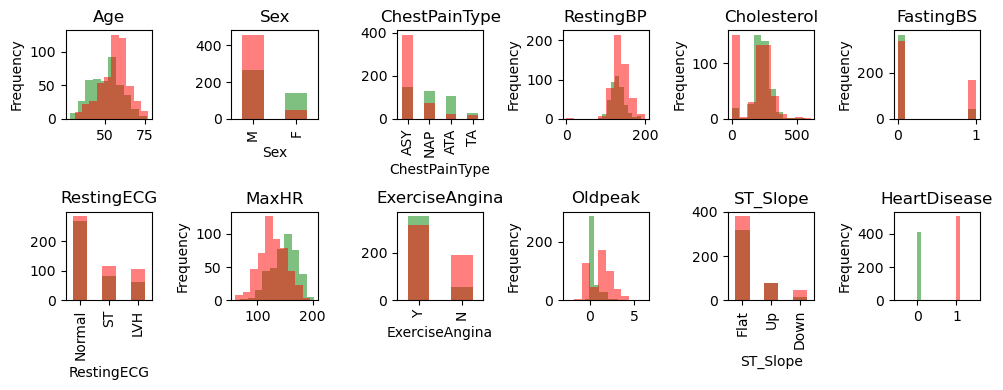

In [3]:
def show_heartdata ( df ): # Alternative z.B. seaborn.pairplot
    fig, axes = plt.subplots ( figsize=(10,4), nrows=2, ncols=len(df.columns)//2 )
    for c,ax in zip ( df.columns, axes.flatten() ):
        ax.set_title(c)
        for hd in [0,1]:
            if df[c].dtype == "object":
                df[c][df["HeartDisease"]==hd].value_counts().plot.bar( ax=ax, alpha=0.5, color="red" if hd==1 else "green" )
            else:
                df[c][df["HeartDisease"]==hd].plot.hist ( ax=ax, alpha=0.5, color="red" if hd==1 else "green" )
    plt.tight_layout();
    
show_heartdata ( df )

### 3.1 Daten-Preprocessing

**Konvention:** Die Daten sollen in einer Datenmatrix `X` und einem Zielvektor `y` vorliegen.

In [4]:
X = df.iloc[:600,:-1].copy()     # wir nehmen nur die ersten 600 Zeilen zum Trainieren.
y = df.iloc[:600,-1].copy()      # Die letzte Spalte "HeartDisease" wird in eine Variable y absepariert.
                                 # (.loc/.iloc als Notation zum Zugriff auf Datenzeilen in pandas -- später dazu mehr)


Umwandlung kategorischer in numerische Features (schlecht, aber schnell: alles via Label Encoding -> Hausaufgabe):

In [7]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X = pd.DataFrame ( enc.fit_transform(X.values), columns = X.columns ) # Spaltennamen gehen leider sonst verloren
X.head() # Die Spalte "HeartDisease" fehlt, diese wird separat in der Variable y gespeichert.


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12.0,1.0,1.0,35.0,134.0,0.0,1.0,93.0,0.0,10.0,2.0
1,21.0,0.0,2.0,48.0,33.0,0.0,1.0,79.0,0.0,19.0,1.0
2,9.0,1.0,1.0,25.0,129.0,0.0,2.0,24.0,0.0,10.0,2.0
3,20.0,0.0,0.0,33.0,63.0,0.0,1.0,33.0,1.0,24.0,1.0
4,26.0,1.0,2.0,42.0,45.0,0.0,1.0,47.0,0.0,10.0,2.0


### 3.2 Der DecisionTreeClassifier aus Scikit-Learn

Die Machine Learning Modelle (und weitere Klassen z.B. zum Preprocessing) haben eine einheitliche Struktur, insb.:
- `obj = <sklearn-Klasse>(...)` (Initialisierung mit sog. Hyperparametern)
- `obj.fit ( X [, y] )` (Anpassen des Objekts auf gegebene Trainingsdaten)
- `obj.predict ( X )` (Anwenden des trainierten Objekts zur Vorhersage der Zielgröße)
- `obj.transform ( X )`, `obj.fit_transform ( X )` (Anwendung von Preprocessing-Klassen)

**Ein einfacher Baum**. "gini" ist ein Maß für die "Impurity". 0 bedeutet: eine Menge enthält nur 0en oder nur 1en. 1/2 bedeutet: die Menge ist gut durchmischt. Der [Splitting-Algorithmus](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation) sucht nach optimalen Feature/Threshold-Kombinationen, um die Impurity-Maße nach dem Split (Mittelung der Impurity-Maße der beiden neu erzeugten Teilmengen) zu minimieren.

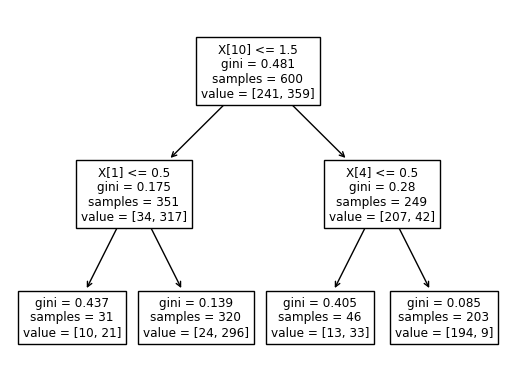

In [371]:
from sklearn import tree
clf = tree.DecisionTreeClassifier ( max_depth=2 )
clf.fit ( X, y )
tree.plot_tree ( clf );


In [ ]:
# In der Baum-Visualisierung:
# Erste Zeile: Split-Kriterium
# Zweite Zeile: Impurity vor dem Split
# Dritte Zeile: Anzahl Zeilen vor dem Split
# Vierte Zeile: Anzahl y=0 vs y=1 vor dem Split


In [370]:
# Vorhersage der Klassen 0=gesund, 1=krank
# (kann dann mit den wahren Werten 
#  y verglichen werden)
clf.predict ( X )


array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

Zusammenfassung der Klassifikationsergebnisse in einer **Konfusionsmatrix**:

| Wahre Klasse: |         | positiv (krank) | negativ (gesund) |
|---| ----------------------|-----------------|------------------|
| **Vorhergesagte Klasse:** | **positiv (krank)**       | ? (TP)      | ? (FP)   | 
|                           | **negativ (gesund)**      | ? (FN)      | ? (TN)   |

**Vier Felder:**
- **Richtig positiv (TP)**: Der Patient ist krank, und der Test hat dies richtig angezeigt.
- **Falsch positiv (FP)**: Der Patient ist gesund, aber der Test hat ihn fälschlicherweise als krank eingestuft.
- **Richtig negativ (TN)**: Der Patient ist gesund, und der Test hat dies richtig angezeigt.
- **Falsch negativ (FN)**: Der Patient ist krank, aber der Test hat ihn fälschlicherweise als gesund eingestuft.
&nbsp;  
<div class="tinyfont">Konvention: "Positiv" ist das "unnormale"/"das seltenere", das detektiert werden soll.</div>

In [11]:
# Vergleiche den Vektor der predictions mit dem Vektor der Ground Truth (y)
predictions = clf.predict ( X )

TP =
FP =
TN =
FN =

In [8]:
TP = (y==1) & (predictions == 1)
FP = (y==0) & (predictions == 1)
TN = (y==0) & (predictions == 0)
FN = (y==1) & (predictions == 0)

TP = TP.sum()
FP = FP.sum()
TN = TN.sum()
FN = FN.sum()

TP, FP, TN, FN

(350, 47, 194, 9)

Zusammenfassung in einer **Konfusionsmatrix**:

| Wahre Klasse: |         | positiv (krank) | negativ (gesund) |
|---| ----------------------|-----------------|------------------|
| **Vorhergesagte Klasse:** | **positiv (krank)**       |350 (TP)      | 47 (FP)   | 
|                           | **negativ (gesund)**      | 9 (FN)      | 194 (TN)   |

Von 600 Personen wurden also 544=350+194 Personen der korrekten Klasse zugeordnet.

**Treffergenauigkeit** (**Accuracy**): (TP+TN)/(TP+TN+FP+FN) = 544 / 600 = 90,6\%. 

<div class="tinyfont">Wir werden noch diskutieren, dass es in der Praxis bessere Metriken als die Accuracy gibt.</div>

**An der Tafel:** Diskussion der Metrik "Accuracy" im Beispiel 100 Patienten, hiervon genau 1 krank, 99 gesund. Der Test sagt immer "Sie sind gesund". Was ist die Accuracy? => Wir brauchen eine bessere Metrik, die auch im unbalancierten Fall gut funktioniert.

Für den Rest der Vorlesung soll ein langer Baum (**links**) mit einem kurzen Baum (**rechts**) verglichen werden.

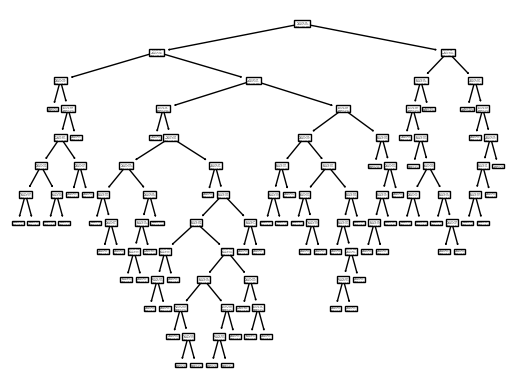

In [366]:
clf_long = tree.DecisionTreeClassifier ( )
clf_long.fit ( X, y )
tree.plot_tree ( clf_long );


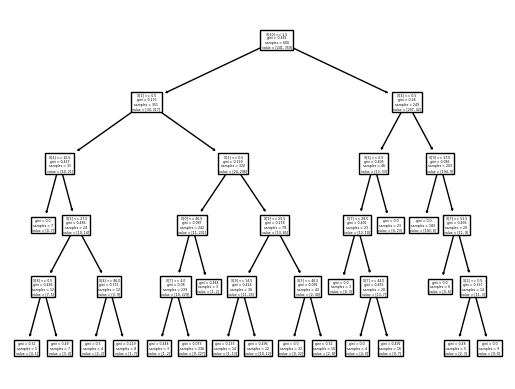

In [360]:
clf_short = tree.DecisionTreeClassifier(max_depth=5,
                                 min_samples_leaf=3)
clf_short.fit ( X, y )
tree.plot_tree ( clf_short );


### 3.3 Vorhersage der Klassen 0=gesund, 1=krank auf den Trainingsdaten

In [258]:
# Erstes Modell: Langer Entscheidungsbaum
pred_long = clf_long.predict(X)
pred_long


array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [361]:
# Alternativmodell: kurzer Entscheidungsbaum
pred_short = clf_short.predict(X)
pred_short


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

### 3.4 Evaluation auf den Trainingsdaten

In [260]:
# langer Baum

TP = (y==1) & (pred_long == 1)
FP = (y==0) & (pred_long == 1)
TN = (y==0) & (pred_long == 0)
FN = (y==1) & (pred_long == 0)

TP = TP.sum()
FP = FP.sum()
TN = TN.sum()
FN = FN.sum()
acc = (TP+TN)/(TP+TN+FP+FN)

print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
print(f"Accuracy: {acc*100:.02f}%")


TP: 359, FP: 0, TN: 241, FN: 0
Accuracy: 100.00%


In [362]:
# kurzer Baum

TP = (y==1) & (pred_short == 1)
FP = (y==0) & (pred_short == 1)
TN = (y==0) & (pred_short == 0)
FN = (y==1) & (pred_short == 0)

TP = TP.sum()
FP = FP.sum()
TN = TN.sum()
FN = FN.sum()
acc = (TP+TN)/(TP+TN+FP+FN)

print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
print(f"Accuracy: {acc*100:.02f}%")


TP: 349, FP: 30, TN: 211, FN: 10
Accuracy: 93.33%


### 3.6 Evaluation auf Daten, die nicht zum trainieren verwendet wurden ("Test/Validierungsdaten")

In [285]:
X_test = df.iloc[600:,:-1].copy()     # wir nehmen die verbleibenden Zeilen zum Testen (besser wäre: randomisiert)
y_test = df.iloc[600:,-1].copy()


<div class="alert alert-block alert-warning"><b>Frage:</b> Was könnte bei der Neuerstellung des Encoders auf die Testdaten schiefgehen?</div>

In [237]:
# from sklearn.preprocessing import OrdinalEncoder
# enc = OrdinalEncoder()
# X_test = pd.DataFrame ( enc.fit_transform(X_test), columns = X_test.columns )


In [286]:
# Wiederverwendung des Label-Encoders, der für die Trainingsdaten verwendet wurde, damit die Zuordnung Wert->Zahl identisch ist
X_test = pd.DataFrame ( enc.transform(X_test.values), columns = X_test.columns )


Evaluierung auf den Testdaten:

In [291]:
# langer Baum
pred_long_test = clf_long.predict(X_test)

TP = (y_test==1) & (pred_long_test == 1)
FP = (y_test==0) & (pred_long_test == 1)
TN = (y_test==0) & (pred_long_test == 0)
FN = (y_test==1) & (pred_long_test == 0)

TP = TP.sum()
FP = FP.sum()
TN = TN.sum()
FN = FN.sum()
acc = (TP+TN)/(TP+TN+FP+FN)

print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
print(f"Accuracy: {acc*100:.02f}%")


TP: 101, FP: 39, TN: 130, FN: 48
Accuracy: 72.64%


In [363]:
# kurzer Baum
pred_short_test = clf_short.predict(X_test)

TP = (y_test==1) & (pred_short_test == 1)
FP = (y_test==0) & (pred_short_test == 1)
TN = (y_test==0) & (pred_short_test == 0)
FN = (y_test==1) & (pred_short_test == 0)

TP = TP.sum()
FP = FP.sum()
TN = TN.sum()
FN = FN.sum()
acc = (TP+TN)/(TP+TN+FP+FN)

print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
print(f"Accuracy: {acc*100:.02f}%")


TP: 117, FP: 52, TN: 117, FN: 32
Accuracy: 73.58%


**Zusammenfassung:** Nicht die Performance auf den Trainingsdaten, sondern die Performance auf den zuvor nicht gesehenen Testdaten gibt Auskunft über die Generalisierungsfähigkeit. Ein Unterschied zwischen Trainings- und Testperformance lässt auf einen **Overfit** schließen.

<img src="VL03_Material/datenarten.png" width="80%" />
<div class="tinyfont">Abb. 3 aus: Nazemi, Kawa & Kaupp, Lukas & Burkhardt, Dirk & Below, Nicola. (2021). Datenvisualisierung. 10.1515/9783110657807-026.</div>

# <div style="color:gray;">1. Visualisierung und Encodings</div>
# <div style="color:gray;">2. DecisionTreeClassifier</div>

# Vielen Dank für Ihre Aufmerksamkeit!

# Anhang

<img src="VL03_Material/treesplit.png" width="80%">

<div class="tinyfont">https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation</div>

<img src="VL03_Material/treesplit2.png" width="80%">

<div class="tinyfont">https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation</div>

### 3.1 Indexierung in Pandas Dataframes

In [4]:
import pandas as pd
df = pd.read_csv("VL02_Material/heart.csv")


# mit .head() zeigt man nur die ersten Zeilen an
df.head()


# mit .tail() werden die letzten Zeilen
# angezeigt.


# Mit dem Parameter n (default n=5)
# wird die Anzahl der Zeilen spezifiziert.


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [187]:
# Einfacher Zugriff auf eine Spalte
df["ChestPainType"].head()


0    ATA
1    NAP
2    ATA
3    ASY
4    NAP
Name: ChestPainType, dtype: object

In [406]:
# Boolscher Vektor
idx = df["ChestPainType"] == "ASY"
idx.head()


0    False
1    False
2    False
3     True
4    False
Name: ChestPainType, dtype: bool

In [190]:
# "Boolean Indexing" (mit anschließender Aggregierung)
df["Age"][idx].mean()

54.95967741935484

Genauere Indizierung mit `.loc` und `.iloc`:

In [193]:
# Indizierung mit .loc verwendet Spaltennamen
df.loc[:,"ChestPainType"].head()


0    ATA
1    NAP
2    ATA
3    ASY
4    NAP
Name: ChestPainType, dtype: object

In [194]:
# Indizierung mit .iloc verwendet Spaltennummern
df.iloc[:,2].head()


0    ATA
1    NAP
2    ATA
3    ASY
4    NAP
Name: ChestPainType, dtype: object

In [196]:
# Zugriff auf Spaltennamen und Index
df.loc[3,"ChestPainType"]


'ASY'

In [197]:
# Zugriff auf Spalten- und Zeilennummer
df.iloc[3,2]


'ASY'

In [202]:
df2 = df.drop(index=0) # Entferne die erste Zeile
df2.head()             


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [408]:
df2.loc[3,"ChestPainType"], df2.iloc[3,2] # Ergebnis?


In [409]:
df2.loc[3,"ChestPainType"], df2.iloc[3,2]


('ASY', 'NAP')